# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.4 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:

import pandas as pd 
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default="colab"

## Importing the Dataset & Exploring it

In [ ]:
df= pd.read_csv("/content/TSLA.csv")

In [ ]:
df#read_csv function from pandas

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

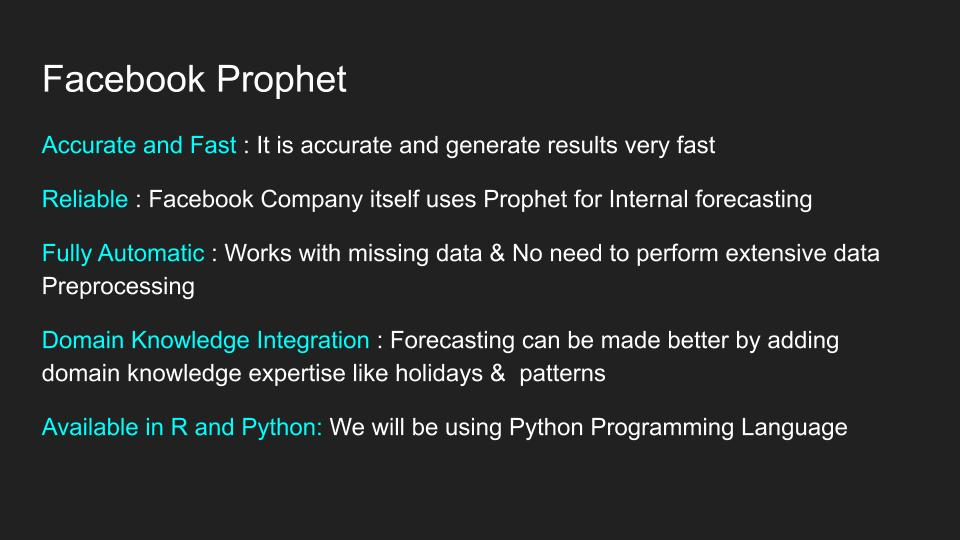

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
columns=['Date',"Close"] 
ndf=pd.DataFrame(df, columns=columns) 

In [ ]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [ ]:
prophet_df=ndf.rename(columns={"Date":'ds', "Close":'y'})

In [ ]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1d0xen2/v4tg2d88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl1d0xen2/f_gr6c00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38511', 'data', 'file=/tmp/tmpl1d0xen2/v4tg2d88.json', 'init=/tmp/tmpl1d0xen2/f_gr6c00.json', 'output', 'file=/tmp/tmp_fsi4znw/prophet_model-20220817183157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:31:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.542942,-25.457894,149.382858,65.542942,65.542942,-5.872634,-5.872634,-5.872634,-5.872634,-5.872634,-5.872634,0.0,0.0,0.0,59.670308
1,2020-03-17,67.338430,-18.306221,151.656810,67.338430,67.338430,-2.416393,-2.416393,-2.416393,-2.416393,-2.416393,-2.416393,0.0,0.0,0.0,64.922037
2,2020-03-18,69.133919,-19.024078,146.734099,69.133919,69.133919,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,0.0,0.0,0.0,65.627062
3,2020-03-19,70.929407,-16.892744,147.366812,70.929407,70.929407,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,0.0,0.0,0.0,67.075311
4,2020-03-20,72.724895,-22.762893,147.990525,72.724895,72.724895,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,0.0,0.0,0.0,64.969877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.200625,810.699557,979.792597,898.942419,901.285053,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,-3.506857,0.0,0.0,0.0,896.693768
277,2021-04-08,902.657492,810.603218,982.660705,901.322584,903.822373,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,-3.854096,0.0,0.0,0.0,898.803395
278,2021-04-09,905.114358,822.606211,984.150897,903.710587,906.347450,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,-7.755018,0.0,0.0,0.0,897.359340
279,2021-04-10,907.571225,833.397027,1001.854188,906.064969,908.864504,11.702500,11.702500,11.702500,11.702500,11.702500,11.702500,0.0,0.0,0.0,919.273725


In [ ]:
px.line(forecast ,x="ds",y="yhat")

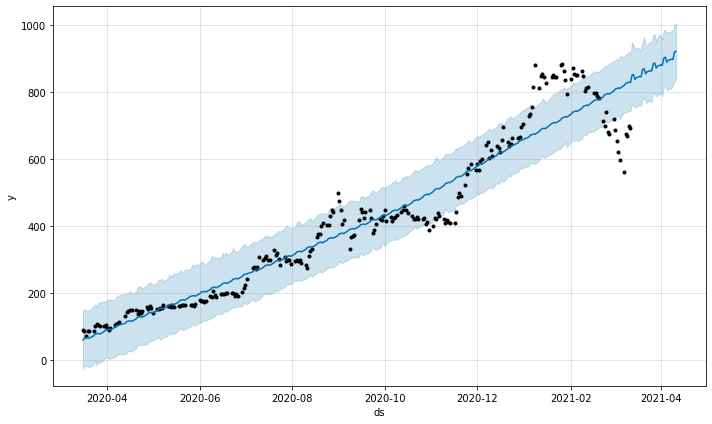

In [ ]:
figure=m.plot(forecast,xlabel="ds",ylabel="y")

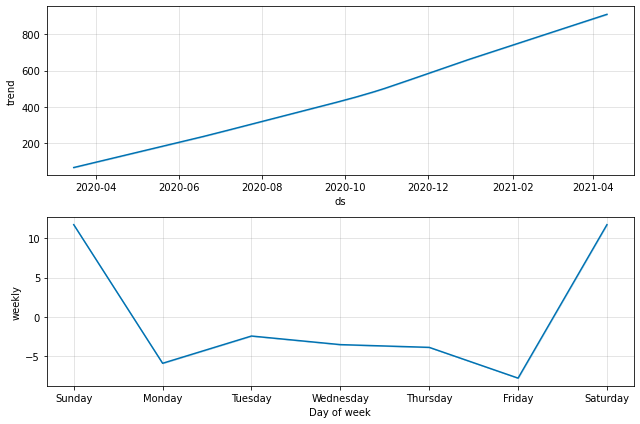

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>